# Building a simple ANN using the Diabetes Dataset

**Context**

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**

- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Outcome Variable **


- 0 = surived
- 1 = Deceased

## 1 Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**We can see that all the features are numerical but with various scales,so it would be a good idea to standardize the dataset**

## 2 Data Exploration

In [3]:
# Checking out the dimensions of the data 

df.shape

(768, 9)

In [4]:
# Checking the datatype of each attribute

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# Statistical summary 

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking if the dataset is balanced or not (Classification only)

class_counts = df.groupby('Outcome').size()
print(class_counts)

Outcome
0    500
1    268
dtype: int64


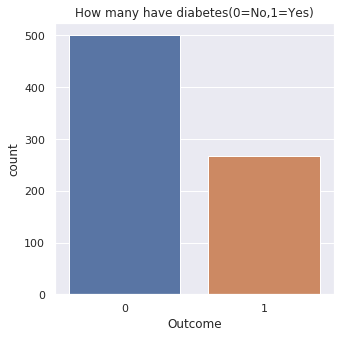

In [7]:
plt.figure(figsize=(5,5))
plt.title('How many have diabetes(0=No,1=Yes)')
locs, labels = plt.xticks()
sns.countplot(df['Outcome']);

**The dataset seems to be fairly balanced**

In [8]:
# Checking correlations between attributes

from pandas import set_option
#set_option('display.width' , 100)     # for setting the display widout of the output window but not that necessary
#set_option('precision' , 3)
correlations =df.corr(method='pearson')
print(correlations)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


In [9]:
# Skew for each attributes

# Positive skew value = right/positive skew
# negative skew value = left/negative skew

# values closer to 0 show less skew

skew = df.skew()
print(skew)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


### 2.1 Visualization -univariate plots

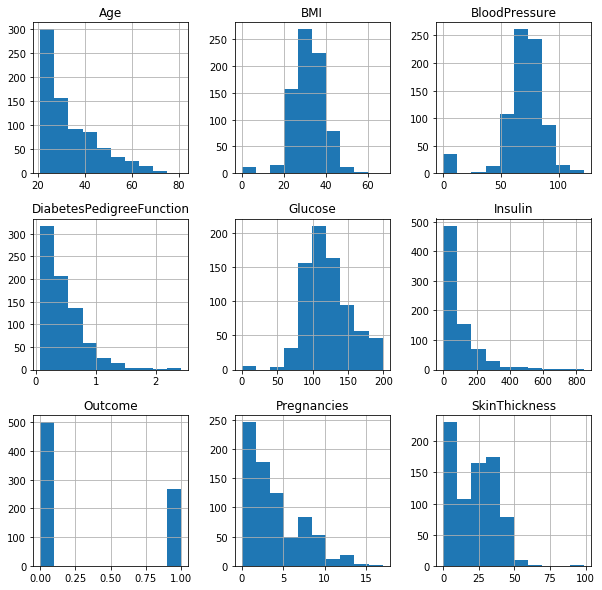

In [0]:
# Histograms

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)  # increasing the size of histograms by using matplotlib top level settings
df.hist();
#plt.show()

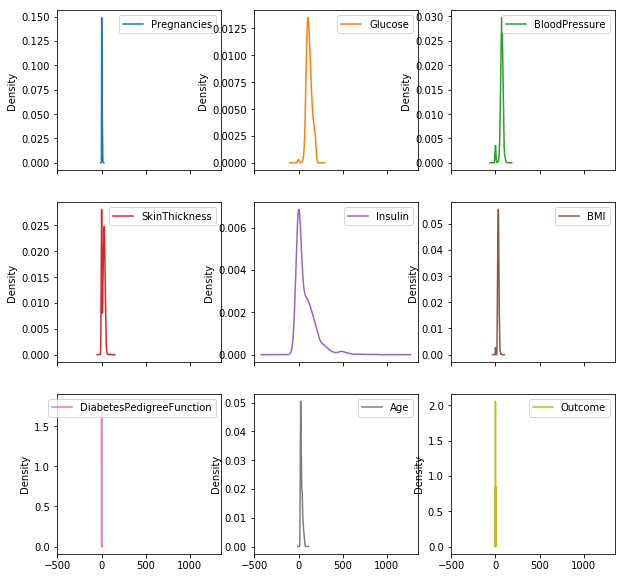

In [0]:
# Density Plots

df.plot(kind = 'density' , subplots=True , layout=(3,3) , sharex=True , figsize=(10,10) );

In [0]:
# Box plots 

# Box plots summarize the distribution of each attribute by drawing a line for the median(middle value) and a box xaround the 
#  25th and 75th percentiles

# Whisker plots 

# Whisker plots gives an idea about the spread of the data and the dots outside the whisker show candidate outlier values

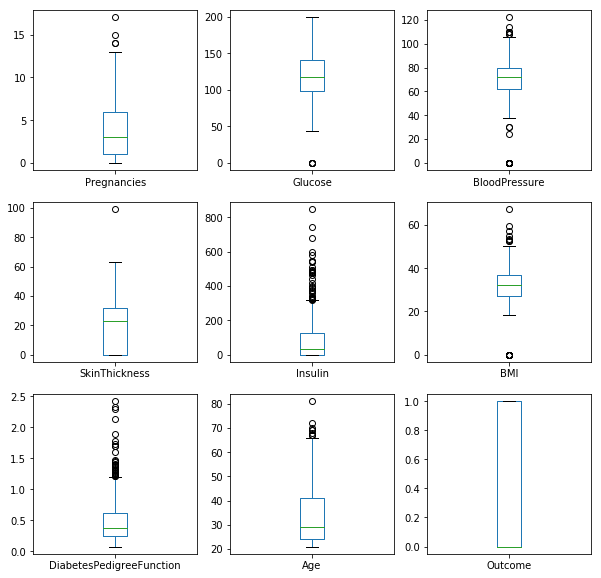

In [0]:
# Box plots 

df.plot(kind = 'box' , subplots=True , layout=(3,3), figsize=(10,10));

**We can see the slight presence of outliers in the dataset**

### 2.2 Visualization - Multivariate plots

- a)Correlation matrix plot

- b)Scatter plot

**Correlation Matrix = gives an indication of how related changes between two variables are **

- A) Positive correlation --- If two variables change in the same diretion
-  B) Negative Correlation --- If teo variables change in the opposite directions together (One goes up,other goes down)

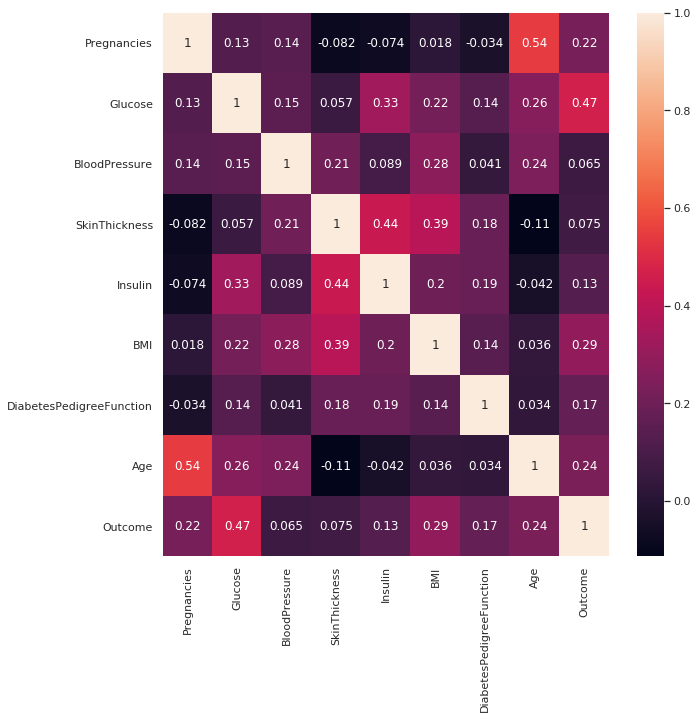

In [0]:
# plotting a correlation matrix using matplotlib

correlations = df.corr()

sns.heatmap(correlations , annot=True )

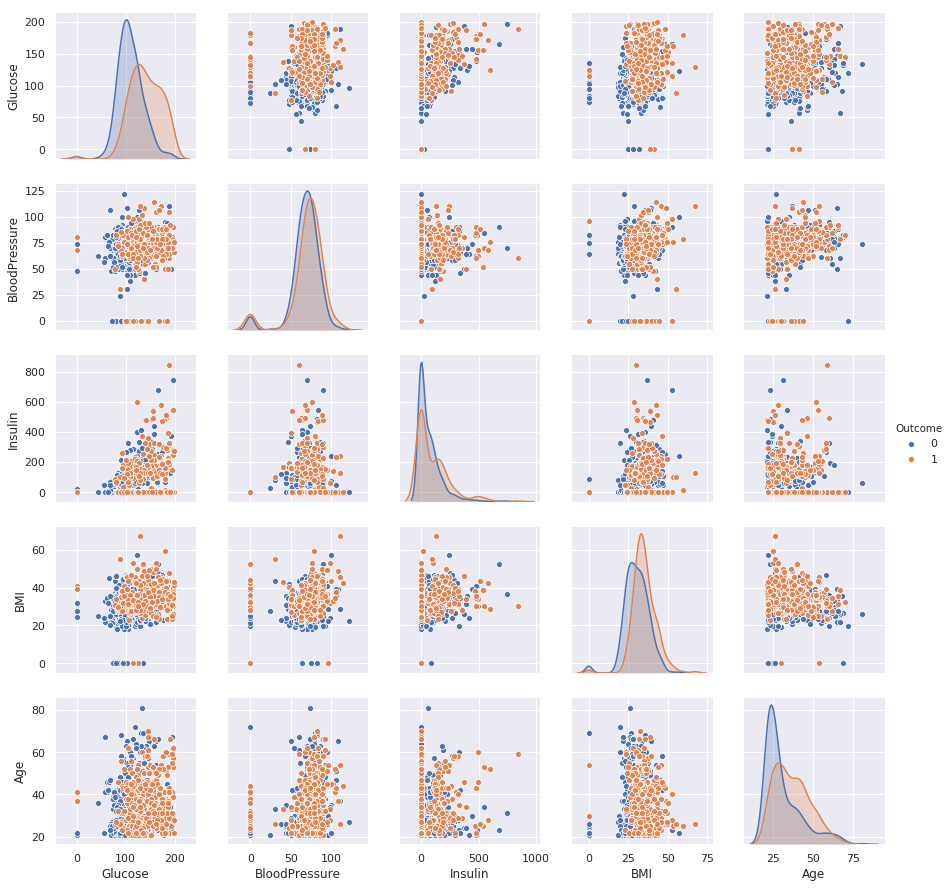

In [0]:
# A scatter plot shows the structural relationship between two variables, one axis for each variable

sns.pairplot(df ,vars =['Glucose', 'BloodPressure','Insulin','BMI','Age'] , hue = 'Outcome' )

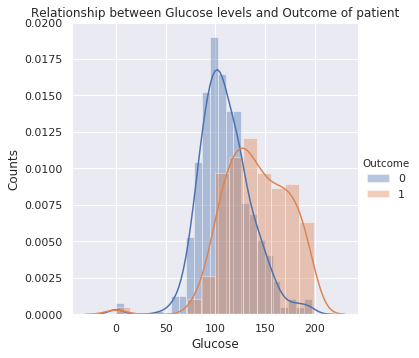

In [0]:
# Checking therealtionship between Glucose and Outcome

sns.FacetGrid(data = df , hue = 'Outcome', height = 5)\
                .map(sns.distplot , 'Glucose')\
                .add_legend()
plt.title('Relationship between Glucose levels and Outcome of patient')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show();


# 0 = survived
# 1 = deceased

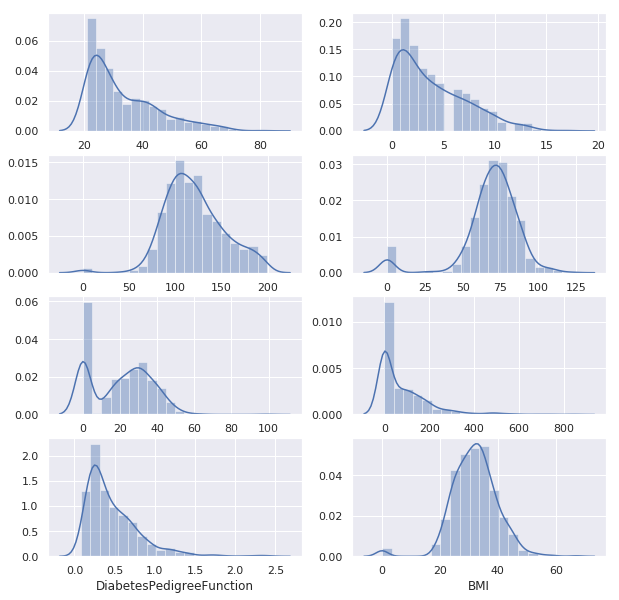

In [0]:
fig, ax = plt.subplots(4,2, figsize=(10,10))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

## 3 Building a ANN

In [0]:
# Selecting the features and outcome variables

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
# creating a model

model = Sequential()

model.add(Dense(units = 12, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dense(units = 8, activation = 'relu', kernel_initializer = 'uniform' ))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

# compiling the model
# We use log loss as for binary classification problems which in keras is defined as binary_crossentropy

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fitting the model

model.fit(X,y, epochs = 300, batch_size = 10)

# Evaluating the model

scores = model.evaluate(X,y)
print(model.metrics_names[1], scores[1]*100)

W0618 06:31:31.509224 139881508202368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 06:31:31.532599 139881508202368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 06:31:31.551978 139881508202368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 06:31:31.554054 139881508202368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 06:31:31.600503 139881508202368 deprecation_wrappe

Epoch 1/300
768/768 [==============================] - 2s 2ms/step - loss: 0.6782 - acc: 0.6484
Epoch 2/300
768/768 [==============================] - 0s 346us/step - loss: 0.6616 - acc: 0.6510
Epoch 3/300
768/768 [==============================] - 0s 339us/step - loss: 0.6549 - acc: 0.6510
Epoch 4/300
768/768 [==============================] - 0s 327us/step - loss: 0.6485 - acc: 0.6549
Epoch 5/300
768/768 [==============================] - 0s 347us/step - loss: 0.6435 - acc: 0.6510
Epoch 6/300
768/768 [==============================] - 0s 332us/step - loss: 0.6320 - acc: 0.6576
Epoch 7/300
768/768 [==============================] - 0s 331us/step - loss: 0.6232 - acc: 0.6628
Epoch 8/300
768/768 [==============================] - 0s 324us/step - loss: 0.6093 - acc: 0.6888
Epoch 9/300
768/768 [==============================] - 0s 338us/step - loss: 0.6067 - acc: 0.6836
Epoch 10/300
768/768 [==============================] - 0s 340us/step - loss: 0.5912 - acc: 0.7057
Epoch 11/300
768/768 

## 4 Model performance Evaluation with train test spilt using  K-fold CV

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import keras 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# Selecting the features and outcome variables

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:
seed = 7
np.random.seed(seed)

In [9]:
# defining the 10 fold CV

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
cvscores = []

for train,test in kfold.split(X,y):
    # Creating the model
    model = Sequential()
    model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # compiling the model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Fitting the model
    model.fit(X[train], y[train],epochs = 300, batch_size = 10 )
    
    # model evaluation
    scores = model.evaluate(X[test], y[test])
    print(model.metrics_names[1], scores[1]*100)
    cvscores.append(scores[1]*100)

Epoch 1/300
691/691 [==============================] - 0s 683us/step - loss: 0.6773 - acc: 0.6512
Epoch 2/300
691/691 [==============================] - 0s 328us/step - loss: 0.6648 - acc: 0.6512
Epoch 3/300
691/691 [==============================] - 0s 341us/step - loss: 0.6533 - acc: 0.6512
Epoch 4/300
691/691 [==============================] - 0s 338us/step - loss: 0.6446 - acc: 0.6512
Epoch 5/300
691/691 [==============================] - 0s 336us/step - loss: 0.6316 - acc: 0.6512
Epoch 6/300
691/691 [==============================] - 0s 351us/step - loss: 0.6210 - acc: 0.6512
Epoch 7/300
691/691 [==============================] - 0s 348us/step - loss: 0.6170 - acc: 0.6512
Epoch 8/300
691/691 [==============================] - 0s 337us/step - loss: 0.6121 - acc: 0.6512
Epoch 9/300
691/691 [==============================] - 0s 344us/step - loss: 0.6100 - acc: 0.6512
Epoch 10/300
691/691 [==============================] - 0s 344us/step - loss: 0.6069 - acc: 0.6512
Epoch 11/300
691/69

**Accuracy : 78.95**

### 4.1 Alternate method of model evaluation using Keras classifier/regressor wrapper with 10 fold cv

In [0]:
# importing libraries

import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [0]:
# Defining a function for use with KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compiling the model 
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [0]:
# importing the dataset and splitting the dataset

df = pd.read_csv('diabetes.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
# create model 
model = KerasClassifier(build_fn = create_model, epochs = 150, batch_size = 10 )

# Model evaluation using 10 fold Cv
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(model, X, y, cv =kfold)
print(results.mean)

Epoch 1/150
691/691 [==============================] - 1s 1ms/step - loss: 0.6722 - acc: 0.6512
Epoch 2/150
691/691 [==============================] - 0s 365us/step - loss: 0.6590 - acc: 0.6512
Epoch 3/150
691/691 [==============================] - 0s 357us/step - loss: 0.6510 - acc: 0.6512
Epoch 4/150
691/691 [==============================] - 0s 352us/step - loss: 0.6401 - acc: 0.6512
Epoch 5/150
691/691 [==============================] - 0s 351us/step - loss: 0.6370 - acc: 0.6512
Epoch 6/150
691/691 [==============================] - 0s 359us/step - loss: 0.6284 - acc: 0.6512
Epoch 7/150
691/691 [==============================] - 0s 368us/step - loss: 0.6302 - acc: 0.6512
Epoch 8/150
691/691 [==============================] - 0s 355us/step - loss: 0.6162 - acc: 0.6512
Epoch 9/150
691/691 [==============================] - 0s 364us/step - loss: 0.6095 - acc: 0.6512
Epoch 10/150
691/691 [==============================] - 0s 376us/step - loss: 0.6090 - acc: 0.6773
Epoch 11/150
691/691 

## 5 Hyperparameter tuning for ANN using GridSearch CV

Hyper parameters to tune 

- Optimizers : for searching different weights 
- Initializers : for preparing the network weights using different schemes
- Number of epochs
- Batch size


In [0]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# import dataset

df = pd.read_csv('diabetes.csv')

# saperating the features and outcome variable

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:
# defining the model

def create_model(optimizer, init):
    model = Sequential()
    model.add(Dense(units = 12, kernel_initializer = init, activation = 'relu'))
    model.add(Dense(units = 8, kernel_initializer = init, activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = init, activation = 'sigmoid'))
    
    # compiling the model
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [17]:
# creating a model for use with grid_search

model = KerasClassifier(build_fn = create_model)

# Setting the grid search parameters

optimizers = ['rmsprop', 'adam']
init = ['uniform', 'glorot_uniform', 'normal']
epochs = np.array([20,30])
batches = np.array([20, 25])

param_grid = dict(optimizer = optimizers, init = init, epochs = epochs, batch_size = batches)
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid_result = grid.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
512/512 [==============================] - 1s 2ms/step - loss: 0.6862 - acc: 0.6387
Epoch 2/20
512/512 [==============================] - 0s 169us/step - loss: 0.6679 - acc: 0.6680
Epoch 3/20
512/512 [==============================] - 0s 166us/step - loss: 0.6568 - acc: 0.6680
Epoch 4/20
512/512 [==============================] - 0s 171us/step - loss: 0.6541 - acc: 0.6680
Epoch 5/20
512/512 [==============================] - 0s 171us/step - loss: 0.6480 - acc: 0.6680
Epoch 6/20
512/512 [==============================] - 0s 170us/step - loss: 0.6440 - acc: 0.6680
Epoch 7/20
512/512 [==============================] - 0s 175us/step - loss: 0.6389 - acc: 0.6680
Epoch 8/20
512/512 [==============================] - 0s 177us/step - loss: 0.6334 - acc: 0.6914
Epoch 9/20
512/512 [==============================] - 0s 189us/step - loss: 0.6290 - acc: 0.6797
Epoch 10/20
512/512 [==============================] - 0s 178us/step - loss: 0.6207 - acc: 0.6699
Epoch 11/20
512/512 [==========

In [18]:
# summarizing the results 

best_parameters = grid.best_params_
best_accuracy = grid.best_score_

print(best_accuracy, best_parameters)

0.696614581781129 {'batch_size': 20, 'epochs': 30, 'init': 'uniform', 'optimizer': 'adam'}


**Thus, the nbest parameters after grid_search are :**
- batch_size = 20
- epochs = 20
- initializer = uniform

**The number epochs and batch_size are kept low due to machine constraints**